In [3]:
import  numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import control.matlab as ml
from scipy import signal

In [3]:
def aumentar_x_veces_20dB(x, numerador):
    return (10**x)*numerador

# Setear transferencia

In [4]:
#Transferencia a partir de polos y ceros
ceros = [np.complex(0, 50), np.complex(0, -50)]
polos = [np.complex(-30, -40), np.complex(-30, 40)]


numerador = poly.polyfromroots(ceros)
denominador = poly.polyfromroots(polos)

numerador = numerador[::-1]
denominador = denominador[::-1]

In [5]:
denominador

array([1.0e+00+0.j, 6.0e+01+0.j, 2.5e+03+0.j])

In [6]:
G = ml.tf(numerador, denominador)*-100
G


-100 s^2 - 2.5e+05
------------------
s^2 + 60 s + 2500

# Chequeo polos

In [16]:
#calcular polos
roots = np.roots(numerador)
print("cantidad de raices")
print(len(roots))
print("raices:")
print(roots)

cantidad de raices
2
raices:
[0.00000000e+00+50.j 3.55271368e-15-50.j]


In [17]:
coeficientes = poly.polyfromroots(roots)
print("Coeficientes: ")
print(coeficientes)

Coeficientes: 
[ 2.50000000e+03+1.77635684e-13j -3.55271368e-15-1.42108547e-14j
  1.00000000e+00+0.00000000e+00j]


# Bode

/home/rodrigo/python-virtual-environments/venv-circuitos/lib/python3.6/site-packages/control/xferfcn.py:919: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
/home/rodrigo/python-virtual-environments/venv-circuitos/lib/python3.6/site-packages/control/xferfcn.py:935: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


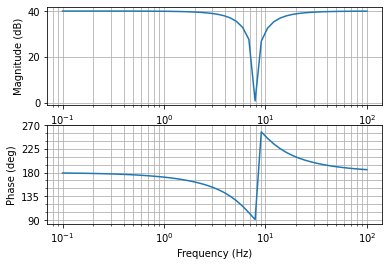

In [18]:
mod, fase, w = ml.bode(G)
plt.show()

# Respuesta al escalon

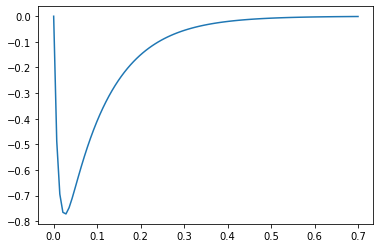

In [19]:
yout, T = ml.step(G)
plt.plot(T,yout)
plt.show()

# Respuesta al impulso

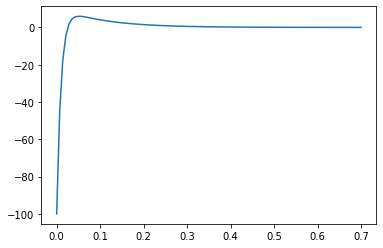

In [20]:
yout, T = ml.impulse(G)
plt.plot(T,yout)
plt.show()

# Respuesta a la cuadrada o al seno

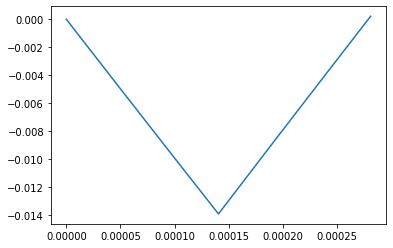

In [21]:
frecuencia = 3560 #en Hz
periodo = 1/frecuencia #en segundos
t = np.linspace(0, 1*periodo, 100000, endpoint=False)

sig = signal.square(2 * np.pi * frecuencia * t) #Respuesta a la cuadrada
#sig = np.sin(2*np.pi*frecuencia*t) #Respuesta al seno

yout, T, xout = ml.lsim(G, U = sig, T = t)
plt.plot(T,yout)
#plt.plot(t, sig)
plt.show()

In [4]:
#calcular polos
roots = np.roots([1, 3.554*(10**4), 1.895*(10**9), 2.245*(10**13), 3.99*(10**17)])
#roots = np.roots([1, 1.197*(10**4), 2.296*(10**8), 1.474*(10**12), 6873*(10**15)])
print("Cantidad de polos: {}".format(len(roots)))
for r in roots:
    print(r.round(2))

Cantidad de polos: 4
(-12002.32+34212.9j)
(-12002.32-34212.9j)
(-5767.68+16439.38j)
(-5767.68-16439.38j)


In [5]:
for r in roots:
    print(r.round(2))

(-12002.32+34212.9j)
(-12002.32-34212.9j)
(-5767.68+16439.38j)
(-5767.68-16439.38j)


In [17]:
from sympy import factor, symbols, simplify

In [18]:
s = symbols('s')

In [19]:
den_s = (s**4) + ( (s**3)*(3.554*(10**4)) )+ ( (s**2)*(1.895*(10**9)) ) + ( s*(2.245*(10**13)) ) + (3.99*(10**17))

In [20]:
den_s

s**4 + 35540.0*s**3 + 1895000000.0*s**2 + 22450000000000.0*s + 3.99e+17

In [21]:
fac = 1
for r in roots:
    fac *= (s-r)

In [22]:
simplify((s-roots[0])*(s-roots[1]))

1.0*s**2 + 24004.6495413716*s + 1314578648.11018

In [23]:
simplify((s-roots[2])*(s-roots[3]))

1.0*s**2 + 11535.3504586284*s + 303519306.793548

In [25]:
np.sqrt(1314578648.11018)

36257.11858532307

In [26]:
np.sqrt(303519306.793548)

17421.80549752373

In [27]:
24004.6495413716/2

12002.3247706858

In [28]:
11535.3504586284/2

5767.6752293142